<a href="https://colab.research.google.com/github/takazatsushiina/Praktikum_AI_Workflow/blob/main/praktikum_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pembuatan Data Set

In [1]:
import pandas as pd

data = {
    "Tanggal": ["2025-01-01", "2025-01-02", "2025-01-03", "2025-01-04", "2025-01-05", "2025-01-06", "2025-01-07", "2025-01-08", "2025-01-09", "2025-01-10"],
    "Produk": ["Minyak Goreng", "Beras", "Gula", "Terigu", "Mie Goreng", "Bumbu", "Kecap", "Kaldu", "Sirup", "Kacang"],
    "Jumlah terjual": [12, 23, 15, 16, 20, 10, 15, 25, 30, 15],
    "Stok": [15, 25, 16, 17, 25, 15, 20, 25, 35, 20],
    "Harga Satuan": [15000, 23000, 12000, 6000, 3500, 1500, 6000, 7000, 17599, 50000],
}

dt = pd.DataFrame(data)
dt.to_csv("data_penjualan.csv", index=False)

print("file csv berhasil disimpan")



file csv berhasil disimpan


In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Tanggal         5 non-null      object
 1   Produk          5 non-null      object
 2   Jumlah terjual  5 non-null      int64 
 3   Stok            5 non-null      int64 
 4   Harga Satuan    5 non-null      int64 
dtypes: int64(3), object(2)
memory usage: 332.0+ bytes


In [ ]:
dt["Tanggal"] = pd.to_datetime(dt["Tanggal"])
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Tanggal         5 non-null      datetime64[ns]
 1   Produk          5 non-null      object        
 2   Jumlah terjual  5 non-null      int64         
 3   Stok            5 non-null      int64         
 4   Harga Satuan    5 non-null      int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 332.0+ bytes


In [ ]:
dt["Tanggal"] = pd.to_datetime(dt["Tanggal"])
dt["Total Penjualan"] = dt["Jumlah terjual"] * dt["Harga Satuan"]
dt

,Tanggal,Produk,Jumlah terjual,Stok,Harga Satuan,Total Penjualan
0,2025-01-01,Minyak Goreng,12,15,15000,180000
1,2025-01-02,Beras,23,25,23000,529000
2,2025-01-03,Gula,15,16,12000,180000
3,2025-01-04,Terigu,16,17,6000,96000
4,2025-01-05,Mie Goreng,20,25,3500,70000


Keuntungan

In [ ]:
dt['Tanggal'] = pd.to_datetime(dt['Tanggal'])

dt["Total Penjualan"] = dt["Jumlah terjual"] * dt["Harga Satuan"]
dt["Keuntungan"] = dt["Total Penjualan"] - (dt["Jumlah terjual"] * 10000)
dt


,Tanggal,Produk,Jumlah terjual,Stok,Harga Satuan,Total Penjualan,Keuntungan
0,2025-01-01,Minyak Goreng,12,15,15000,180000,60000
1,2025-01-02,Beras,23,25,23000,529000,299000
2,2025-01-03,Gula,15,16,12000,180000,30000
3,2025-01-04,Terigu,16,17,6000,96000,-64000
4,2025-01-05,Mie Goreng,20,25,3500,70000,-130000


Data Modeling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X = dt[["Jumlah terjual", "Stok"]]
y = (dt["Stok"] <5).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)




DecisionTreeClassifier()

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi model: {accuracy}")

Akurasi model: 1.0


In [ ]:
produk_baru = [[8,6]]
predict = model.predict(produk_baru)

if predict[0] == 1:
  print("Perlu di restock")
else:
  print("Stock Cukup")

Stock Cukup


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


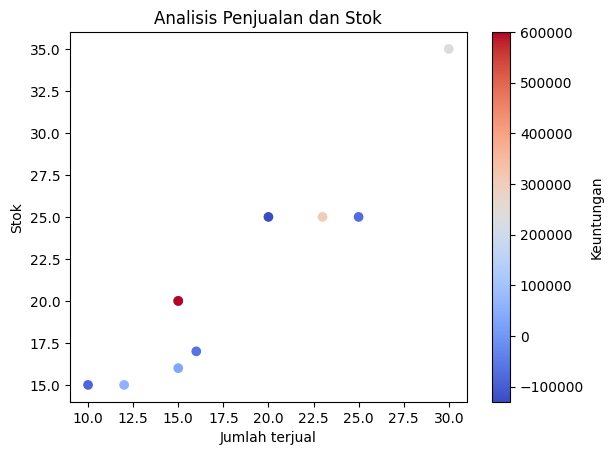

In [14]:
import matplotlib.pyplot as plt


dt["Total Penjualan"] = dt["Jumlah terjual"] * dt["Harga Satuan"]
dt["Keuntungan"] = dt["Total Penjualan"] - (dt["Jumlah terjual"] * 10000)

plt.scatter(dt["Jumlah terjual"], dt["Stok"], c=dt["Keuntungan"], cmap="coolwarm")
plt.xlabel("Jumlah terjual")
plt.ylabel("Stok")
plt.title("Analisis Penjualan dan Stok")
plt.colorbar(label="Keuntungan")
plt.show()